In [34]:
#!pip3 install matplotlib

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm

In [36]:
uber_raw_apr14 =pd.read_csv('uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')
uber_raw_may14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-may14.csv")
uber_raw_jun14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-jun14.csv")
uber_raw_jul14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-jul14.csv")
uber_raw_aug14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-aug14.csv")
uber_raw_sep14 = pd.read_csv("uber-pickups-in-new-york-city/uber-raw-data-sep14.csv")

uber_2014_train = [uber_raw_apr14, uber_raw_may14, uber_raw_jun14, uber_raw_jul14,uber_raw_aug14]
uber_2014_test = uber_raw_sep14

uber_data = pd.concat(uber_2014_train,axis=0,ignore_index=True)
df = uber_data
df1= uber_2014_test
uber_data.head()
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [37]:
#df=df.groupby(pd.Grouper(key='Date/Time'))
df.head(564530)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [38]:
df1.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [39]:
#df=df[~df.index.duplicated()]

In [40]:
df.Timestamp = pd.to_datetime(df['Date/Time'],format='%m/%d/%Y %H:%M:%S') 
df.index = df.Timestamp 
df['Date'] = df.Timestamp.dt.date
#df.tail()                        ##Run this cell twice

/home/shriya/uber/uber_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [41]:
df.Timestamp = pd.to_datetime(df['Date/Time'],format='%m/%d/%Y %H:%M:%S') 
df.index = df.Timestamp 
df['Date'] = df.Timestamp.dt.date
df.tail()  

,Date/Time,Lat,Lon,Base,Date
Date/Time,,,,,
2014-08-31 23:55:00,8/31/2014 23:55:00,40.7552,-73.9753,B02764,2014-08-31
2014-08-31 23:55:00,8/31/2014 23:55:00,40.7552,-73.9753,B02764,2014-08-31
2014-08-31 23:55:00,8/31/2014 23:55:00,40.7617,-73.9788,B02764,2014-08-31
2014-08-31 23:59:00,8/31/2014 23:59:00,40.7395,-73.9889,B02764,2014-08-31
2014-08-31 23:59:00,8/31/2014 23:59:00,40.7270,-73.9802,B02764,2014-08-31


In [42]:
count=df.groupby(pd.Grouper(key='Date')).count()
count.tail()
#df1['Count']=count

,Date/Time,Lat,Lon,Base
Date,,,,
2014-08-27,27018,27018,27018,27018
2014-08-28,28597,28597,28597,28597
2014-08-29,27424,27424,27424,27424
2014-08-30,23930,23930,23930,23930
2014-08-31,23271,23271,23271,23271


In [43]:
df1.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [44]:
df1.Timestamp = pd.to_datetime(df1['Date/Time'],format='%m/%d/%Y %H:%M:%S') 
df1.index = df1.Timestamp 
df1['Date'] = df1.Timestamp.dt.date
#df1.tail()       ##Run this cell twice

/home/shriya/uber/uber_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [45]:
df1.Timestamp = pd.to_datetime(df1['Date/Time'],format='%m/%d/%Y %H:%M:%S') 
df1.index = df1.Timestamp 
df1['Date'] = df1.Timestamp.dt.date
df1.tail()       ##Run this cell twice

,Date/Time,Lat,Lon,Base,Date
Date/Time,,,,,
2014-09-30 22:57:00,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30
2014-09-30 22:57:00,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30
2014-09-30 22:58:00,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30
2014-09-30 22:58:00,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30
2014-09-30 22:58:00,9/30/2014 22:58:00,40.7140,-73.9496,B02764,2014-09-30


In [46]:
count1=df1.groupby(pd.Grouper(key='Date')).count()
count1.tail()
#df1['Count']=count

,Date/Time,Lat,Lon,Base
Date,,,,
2014-09-26,37504,37504,37504,37504
2014-09-27,39468,39468,39468,39468
2014-09-28,29656,29656,29656,29656
2014-09-29,29201,29201,29201,29201
2014-09-30,33431,33431,33431,33431


In [47]:
count= count.drop(columns = ['Lat','Lon','Base'])
count1= count1.drop(columns = ['Lat','Lon','Base'])

In [48]:
count.head()

,Date/Time
Date,
2014-04-01,14546
2014-04-02,17474
2014-04-03,20701
2014-04-04,26714
2014-04-05,19521


In [49]:
count1.head()

,Date/Time
Date,
2014-09-01,19961
2014-09-02,28831
2014-09-03,32631
2014-09-04,38360
2014-09-05,42319


In [50]:
train=count
test=count1

Just plotting of test and train data without any training model

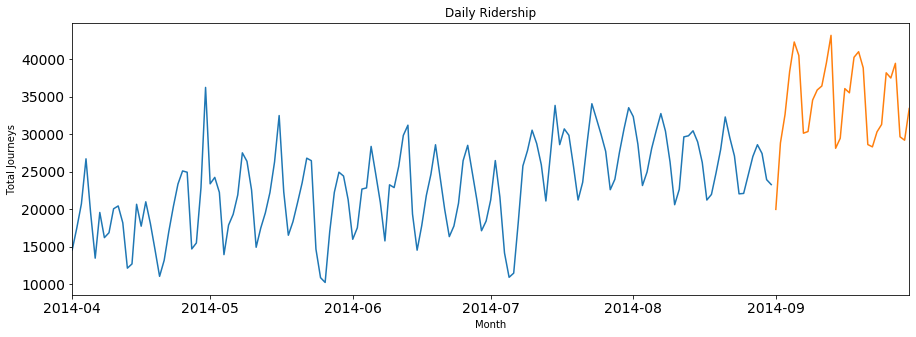

In [51]:
train['Date/Time'].plot(kind='line',figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test['Date/Time'].plot(figsize=(15,5), title= 'Daily Ridership', fontsize=14)
plt.ylabel('Total Journeys')
plt.xlabel('Month')
plt.show()

### ARIMA

/home/shriya/uber/uber_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/shriya/uber/uber_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/shriya/uber/uber_env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/shriya/uber/uber_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


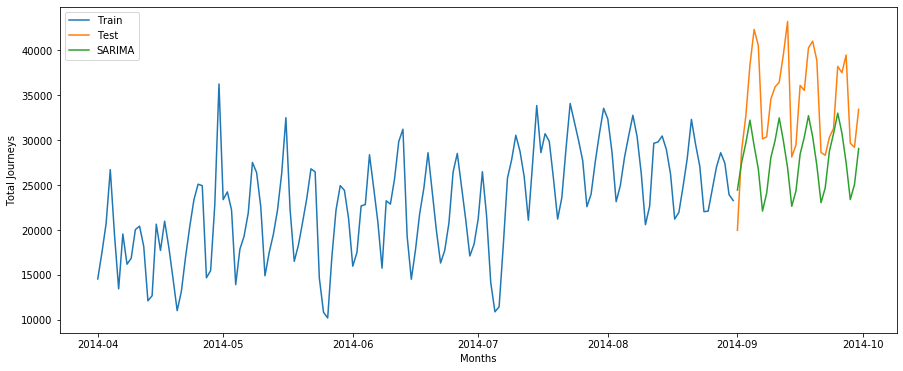

In [52]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['Date/Time'], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-09-01", end="2014-09-30", dynamic=True)
plt.figure(figsize=(15,6))
plt.plot( train['Date/Time'], label='Train')
plt.plot(test['Date/Time'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.ylabel('Total Journeys')
plt.xlabel('Months')
plt.show()


### Holt’s Winter seasonal method

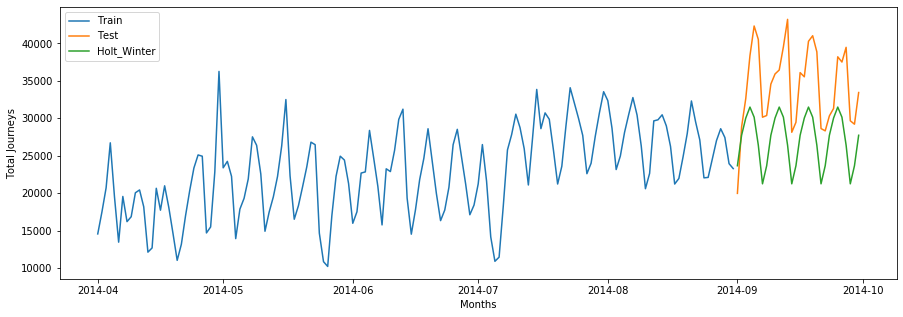

In [53]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Date/Time']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(15,5))
plt.plot( train['Date/Time'], label='Train')
plt.plot(test['Date/Time'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.ylabel('Total Journeys')
plt.xlabel('Months')
plt.show()

### Holt’s Linear Trend method

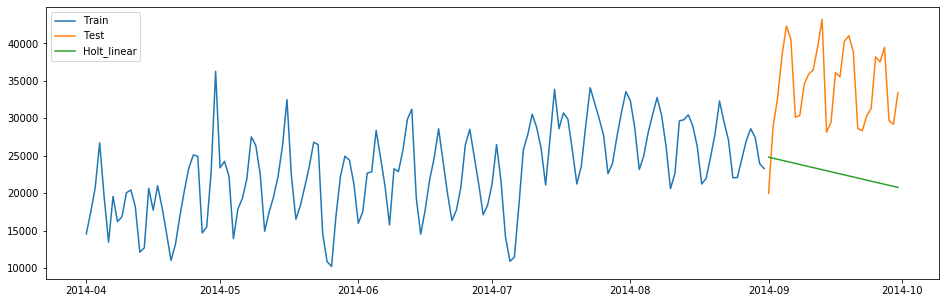

In [54]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Date/Time'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,5))
plt.plot(train['Date/Time'], label='Train')
plt.plot(test['Date/Time'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [55]:
#df.info()